In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.externals import joblib

import warnings 
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_12_Loan_Prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Checking for unique values of Loan_ID

data.Loan_ID.nunique()

614

In [5]:
#Loan Id is index of dataset, we can drop that column

data.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


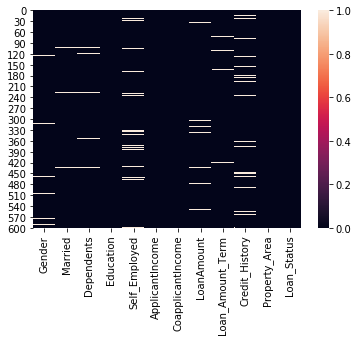

In [9]:
#Checking for null values in dataset

sns.heatmap(data.isnull())

In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null values are present in dataset

In [11]:
#Checking the data type of columns having null values

for col in data.columns:
    if data[col].isnull().sum() > 0:
        print('Data type of ',col, 'is', data[col].dtype)

Data type of  Gender is object
Data type of  Married is object
Data type of  Dependents is object
Data type of  Self_Employed is object
Data type of  LoanAmount is float64
Data type of  Loan_Amount_Term is float64
Data type of  Credit_History is float64


In [12]:
#Lets fill the object values with mode
for col in data.columns:
    if data[col].isnull().sum() > 0 and data[col].dtype=='object':
        data[col].fillna(data[col].mode()[0],inplace=True) 

In [13]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Checking unique values of float datatype col

for col in data.columns:
    if data[col].isnull().sum() > 0 and data[col].dtype!='object':
        nuni = data[col].nunique()
        print(col,' is having ',nuni, 'unique values')

LoanAmount  is having  203 unique values
Loan_Amount_Term  is having  10 unique values
Credit_History  is having  2 unique values


In [15]:
#Checkign unique values of Loan Anmount and Credit History

print("Unique values of Loan_Amount_Term ", data['Loan_Amount_Term'].unique())
print("Unique values of Credit_History ", data['Credit_History'].unique())

Unique values of Loan_Amount_Term  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Unique values of Credit_History  [ 1.  0. nan]


In [16]:
#Filling values with mode for Loan_Amount_Term and Credit History as it is Categorical Data

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True) 


In [17]:
#Filling Loan Amount with mean value as it is continous value
data['LoanAmount'].fillna((data['LoanAmount'].mean()), inplace=True)

In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No Null values present now 

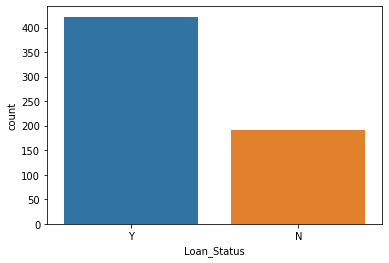

Y    422
N    192
Name: Loan_Status, dtype: int64


In [19]:
#Visualizing data

sns.countplot(x='Loan_Status',data=data)
plt.show()

print(data['Loan_Status'].value_counts())

Most people are eligible for loan

Data looks like imbalanced data

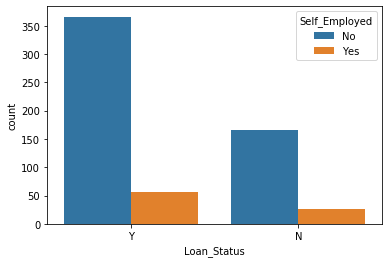

In [20]:
#Checking loan status with Self_Employed
sns.countplot(x="Loan_Status",hue="Self_Employed",data=data)
plt.show()


From the above plot, those wo are self employed are having less possobility of getting loan as compare to non self employed.

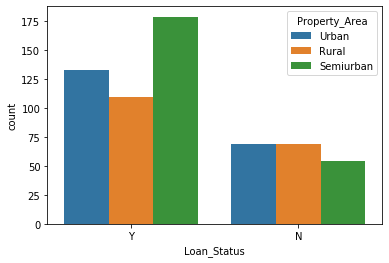

In [21]:
#Checking loan status possibility with Property area

sns.countplot(x="Loan_Status",hue="Property_Area",data=data)
plt.show()

Rural area is having less possibility of getting loan approved

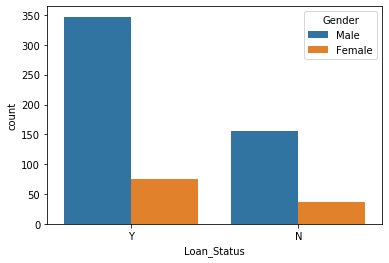

In [22]:
#Checking Loan Status with Gender

sns.countplot(x='Loan_Status',hue='Gender',data=data)
plt.show()

From the observation, male tends to have high possibiltiy of getting loan. Male count is very much higher than female

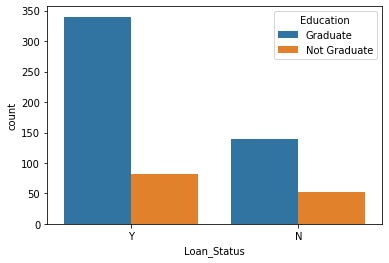

In [23]:
#Checking Loan Status with Education

sns.countplot(x='Loan_Status',hue='Education',data=data)
plt.show()

From the observation, Graduate having more possibility of getting loan than Not Graducate

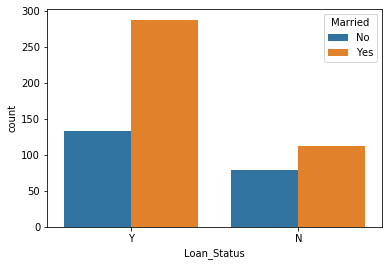

In [24]:
#Checking Loan Status with Education

sns.countplot(x='Loan_Status',hue='Married',data=data)
plt.show()

People who are getting married are having high possibility of getting loan

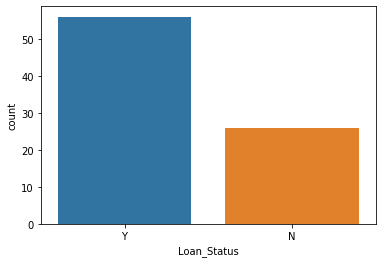

In [25]:
#Plotting Self employed with loan status who got loan
self = data.loc[data["Self_Employed"]=="Yes"]
sns.countplot(x="Loan_Status",data=self)

More self employed people got loan approved.

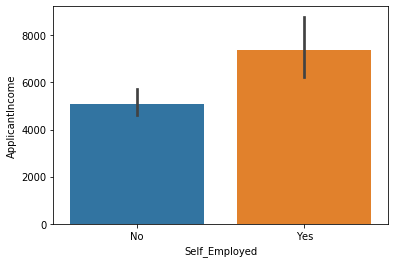

In [26]:
#Plotting self employed with income

sns.barplot(x="Self_Employed",y="ApplicantIncome",data=data)
plt.show()

Self employed having more income as compare to salaried person

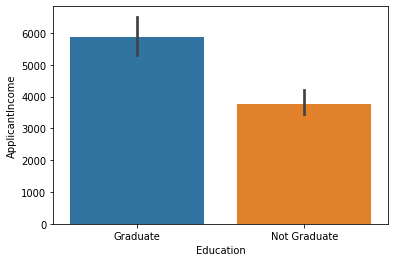

In [27]:
#Comparing income with education

sns.barplot(x="Education",y="ApplicantIncome",data=data)
plt.show()

Graducate tends to have more income than not graduate

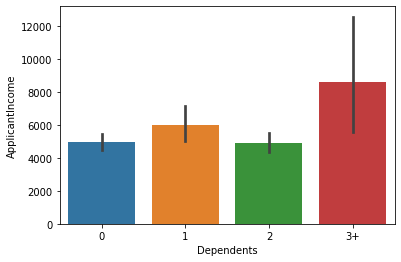

In [28]:
#Comparing income with dependents

sns.barplot(x="Dependents",y="ApplicantIncome",data=data)
plt.show()

Dependent 1 and 3 have more income than 0 and 2

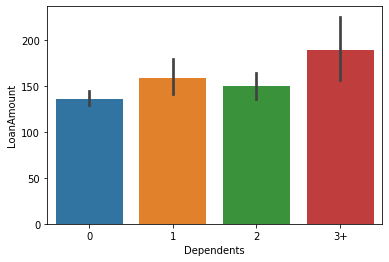

In [29]:
#Comparing loan amount with dependent

sns.barplot(x="Dependents",y="LoanAmount",data=data)
plt.show()

Dependent 3 and 1 have highest loan amount average

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [31]:
#Encoding categorical data

le = LE()

for col in data.columns:
    
    if data[col].dtype=='object':
        data[col] = le.fit_transform(data[col])

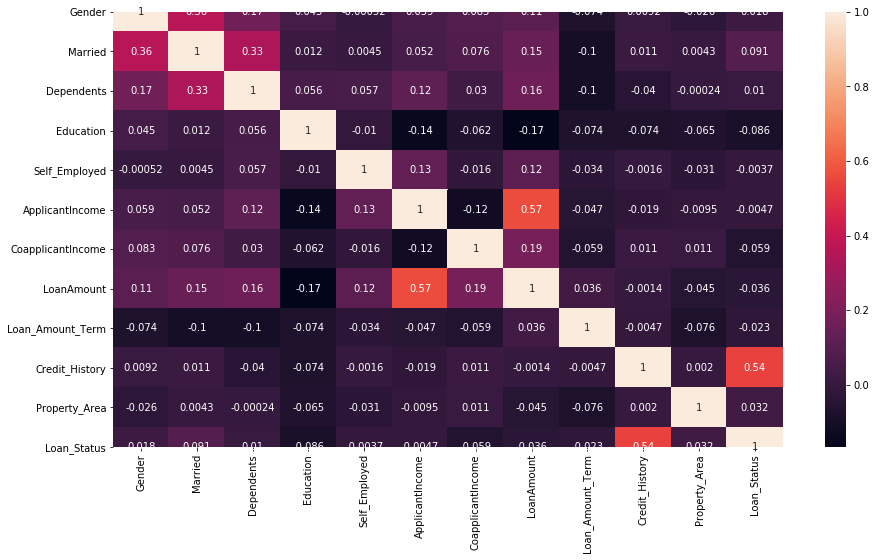

In [32]:
#Checking the correlation of dataset
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

From the above heatmap, we can see that Loan_Status is highly correlated with Credit_History

Loan Amount is highly correlated with Applicant Income



In [33]:
#Describing dataset

data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


From the above description, we can see there is huge difference in mean and max of of ApplicantIncome and CoapplicantIncome and Loan Amount.

Outliers are present in dataset

Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

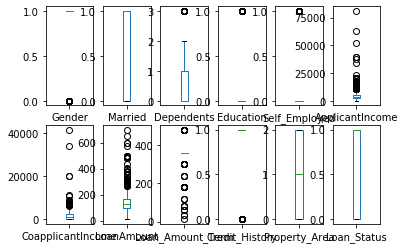

In [34]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,6))

As we can see outliers are present in Dependent, Education, Self_Employed

In [35]:
data.shape

(614, 12)

In [36]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [37]:
data.shape

(577, 12)

### SPLITTIND DATA

In [38]:
x = data.drop(['Loan_Status'],axis=1)
y = data.Loan_Status

In [39]:
x.shape

(577, 11)

In [40]:
y.shape

(577,)

In [41]:
#Checking for skewness 

x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

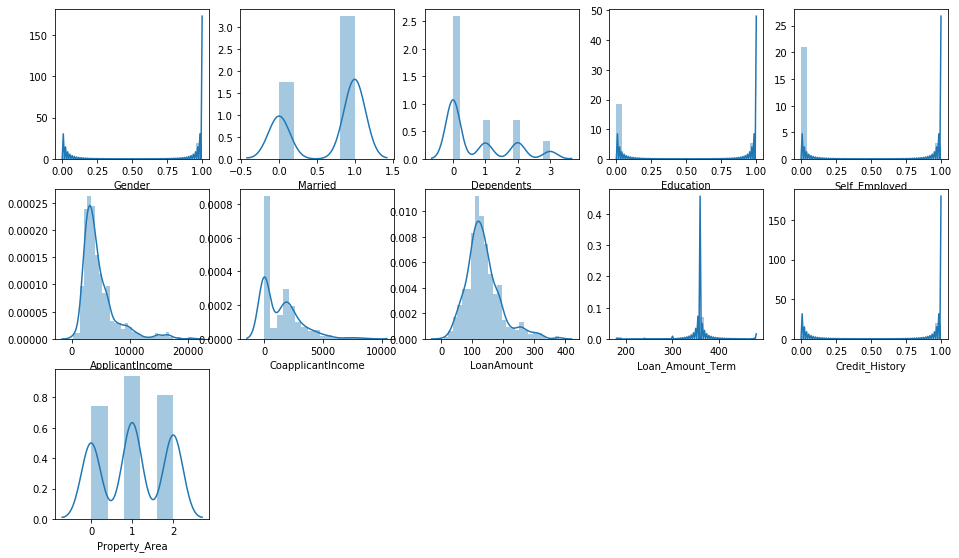

In [42]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

As we can see most of the feature contains skewness. Lets remove the skewness in next step

In [43]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])

In [44]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [45]:
#Lets scale the data using Standard Scalar

ss=SS()
ss.fit(x)
x=ss.transform(x)

### TEST AND TRAIN MODEL

In [46]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score

def main_fun(models):
    accuracy_scores = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        i = 0
        max_accu_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            accu_score = roc_auc_score(test_y,pred_y)
            accu_score = round(accu_score*100)
            if accu_score > max_accu_score:
                max_accu_score = accu_score
                final_r_state = r_state
        print("Max ROC Score Corresponding to random state ", final_r_state, " is ",max_accu_score)
        print()
        print("-----------------------------------------------------------------------------------------------")
        accuracy_scores.append(max_accu_score)
    return accuracy_scores

In [47]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNN()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 18}

In [48]:
#Finding best parameters for SVC

svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'rbf'}

In [49]:
#Finding best parameters for RFC

rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 50}

In [50]:
#Instantiate the classifiers
clf_logreg = LoR()
clf_tree = DTC()
clf_knn =  KNN(n_neighbors=18)
clf_forest = RFC(n_estimators=100)
clf_ada = ABC()
clf_gnb = GNB()
clf_svc = SVC(kernel="rbf",C=0.001)

In [51]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'RandomForest', 'Adaboost','Naive','SVC']

In [52]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_gnb: 'Naive',
          clf_svc: 'SVC'
         }

In [53]:
auc_roc_score = main_fun(models)

Checking ROC score for LogisticRegression
Max ROC Score Corresponding to random state  91  is  79.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
Max ROC Score Corresponding to random state  82  is  75.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
Max ROC Score Corresponding to random state  71  is  78.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
Max ROC Score Corresponding to random state  93  is  80.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Adaboost
Max ROC Score Corresponding to random state  52  is  77.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Naive
Max ROC Score Correspon

### USING CROSS VALIDATION

In [54]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score

def cross_val_main_fun(models):
    roc_auc_score_array = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        
        score = cross_val_score(model,x,y,cv=5,scoring='roc_auc')

        max_auc_score = round(score.mean()*100)
        print('AUC ROC Score: ', score)
        print('Mean Scores: ',score.mean())
        print('Standard deviation: ',score.std())
        print('Final ROC Score :', round(score.mean()*100))
        
        print()
        print("-----------------------------------------------------------------------------------------------")
        roc_auc_score_array.append(max_auc_score)
    return roc_auc_score_array


In [55]:
auc_roc_score_cross_val = cross_val_main_fun(models)

Checking ROC score for LogisticRegression
AUC ROC Score:  [0.75243056 0.70590278 0.71527778 0.80696203 0.77179024]
Mean Scores:  0.7504726743017882
Standard deviation:  0.03707957629787677
Final ROC Score : 75.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
AUC ROC Score:  [0.65486111 0.62361111 0.6625     0.74085795 0.63688969]
Mean Scores:  0.6637439722724533
Standard deviation:  0.04088720240227699
Final ROC Score : 66.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
AUC ROC Score:  [0.78836806 0.73611111 0.70972222 0.83192686 0.74394213]
Mean Scores:  0.7620140772553747
Standard deviation:  0.043160923902141726
Final ROC Score : 76.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
AUC ROC Score:  [0.76319444 0.76354167 0.78142361 0.83702

In [56]:
#Displaying score by train test split
pd.DataFrame(auc_roc_score,columns = ['AUC ROC Scores'],index = classifiers).sort_values(by = 'AUC ROC Scores',ascending = False)

,AUC ROC Scores
RandomForest,80.0
LogisticRegression,79.0
Naive,79.0
KNN,78.0
Adaboost,77.0
DecisionTree,75.0
SVC,50.0


In [57]:
#Displaying score by cross validation
pd.DataFrame(auc_roc_score_cross_val,columns = ['AUC ROC Scores'],index = classifiers).sort_values(by = 'AUC ROC Scores',ascending = False)

,AUC ROC Scores
RandomForest,79.0
SVC,77.0
KNN,76.0
LogisticRegression,75.0
Naive,75.0
Adaboost,72.0
DecisionTree,66.0


FROM THE ABOVE OBSERVATION, WE CAN SAY THAT LOGISTIC REGRESSION HAS DONE WELL WITH DATA AND GAVE MAX ROC SCORE OF 79%. WE ARE SAVING LOGISTIC REGRESSION AS OUR FINAL MODEL

In [58]:
#Logistic Regression gave max score for random state = 91
lor = LoR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=91)
lor.fit(train_x,train_y)
pred_y = lor.predict(test_x)
roc_auc_score = roc_auc_score(test_y,pred_y)
roc_auc_score = round((roc_auc_score)*(100))
print("ROC AUC score is : ", roc_auc_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  79.0
Confusion matrix is

[[16 12]
 [ 0 88]]
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        28
           1       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



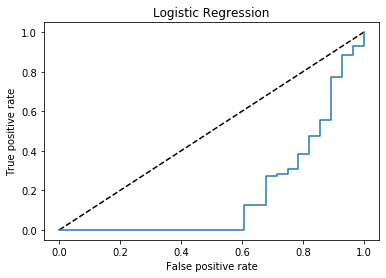

In [59]:
y_pred_prob = lor.predict_proba(test_x)[:,0]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

### SAVIND MODEL

In [60]:
joblib.dump(lor, 'Project_12_Loan_Prediction.pkl')

['Project_12_Loan_Prediction.pkl']

### CONCLUSION

In this project, I've observed that the data was imbalanced as the count of loan status yes is having high count as compare to loan status as No.

Observed that salaried person have high posibility of gettign loan than self employed.
Also person who is married is having high possibility of getting loan.

Also filled missing values with mode and mean approach.
Also observed that Loan_Status is highly correlated with Credit_History
There was a high differrence in mean and max for few features.

To predict the outcomes, I've used train_test_split and cross_val_score with by calculating AUC ROC score as data was imbalanced rather than using accuracy score.

Used Logistic Regression, KNN, SVC, AdaBoost, Random Forest Classifier to predict the model.

By using train_test_split found higher auc_roc_score for Logistic Regression i.e. 79.

And saved the model for Logistic Regression